## Criando Função que remove pontuação, usando punctuation do python3

In [1]:
from string import punctuation


def remove_punctuation(string):
    assert isinstance(string, list), 'Não foi passado uma lista de tokens, como o esperado!'
    
    string = [frase for frase in string if frase not in punctuation]
    
    return string


text = 'eu amo isso, e vc?'

list_text = text.split()

remove_punctuation(list_text)

['eu', 'amo', 'isso,', 'e', 'vc?']

    - Podemos visualizar, que a pontuação não foi removida, como o esperado. 

<br>
<br>

## Criando a mesma função usando o spacy.io
    - Além da pontuação, podemos remover espaços, caso um .strip() não seja suficiente:

In [2]:
# Primeimramente devemos importar o modulo Spacy
import spacy

# Logo em seguida, fazemos o load do "modelo pt", disponivel no spacy,
# e instanciamos um objeto, de nome nlp, para ser utilizado posteriormente

nlp = spacy.load('pt_core_news_sm')


/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [3]:

def remover_punct_and_spaces(text):
    """
    Uma função simples, para remover pontuações e espaços do texto passado, e retorna uma lista,
    com estes tokens "higienizados".
    
    -ARGS:
        text: (STRING)
    
    return tokens (LIST)
    """
    
    object_nlp = nlp(string)
    
    # "nlp.lower_" (como underline) retorna valor do token, em texto e caixa baixa
    tokens = [token.lower_ for token in object_nlp if token.is_punct is False and token.is_space is False]
    
    return tokens


string = ('Eu me chamo Everton, e gostaria de conversar.\n Caso gostar do que irei lhe falar, por gentileza, e retorne. \n'
         'É de extremo valor, seu feedback. \n'
         'Entre em contato comigo para saber mais informações! Se gostou do texto, clique no gostei, agora. Espero que tenha gostado').replace('\n', ' ')



# Visualizando o efeito da função
remover_punct_and_spaces(string)

['eu',
 'me',
 'chamo',
 'everton',
 'e',
 'gostaria',
 'de',
 'conversar',
 'caso',
 'gostar',
 'do',
 'que',
 'irei',
 'lhe',
 'falar',
 'por',
 'gentileza',
 'e',
 'retorne',
 'é',
 'de',
 'extremo',
 'valor',
 'seu',
 'feedback',
 'entre',
 'em',
 'contato',
 'comigo',
 'para',
 'saber',
 'mais',
 'informações',
 'se',
 'gostou',
 'do',
 'texto',
 'clique',
 'no',
 'gostei',
 'agora',
 'espero',
 'que',
 'tenha',
 'gostado']

<br><br>
## Função de lemmatização

In [15]:

def lemma(text, remove_punct_and_spaces=True):
    """
    Função, que irá receber um texto em string, e irá retornar uma lista de tokens lemmatizados.
    
    O segundo parametro, caso True, irá remover espaços e pontuações.
    
    - ARGS:
        - text:(STRING)
        - remove_punct_and_spaces: (BOOL)
        
    return Uma lista, com uma tupla, uma com o elemento lemmatizado, e outro seu Part-of-speech tagging(LIST)
    """
    
    if remover_punct_and_spaces:
        list_tokens = remover_punct_and_spaces(text)
        
        # Transformando o array em string novamente, e então transformando o texto em objeto nlp
        object_nlp = nlp(' '.join(list_tokens))
        
        # deletando a lista
        del list_tokens
        
    else:
        object_nlp = nlp(text)        
        
    tokens = [(token.lemma_, token.pos_) for token in object_nlp]
    
    return tokens

# Utilizando a função
lemma(string)

[('eu', 'PRON'),
 ('me', 'PRON'),
 ('chamar', 'VERB'),
 ('everton', 'NOUN'),
 ('e', 'PUNCT'),
 ('gostar', 'VERB'),
 ('de', 'ADP'),
 ('conversar', 'VERB'),
 ('casar', 'SCONJ'),
 ('gostar', 'VERB'),
 ('do', 'ADP'),
 ('que', 'SCONJ'),
 ('irar', 'AUX'),
 ('lhe', 'PRON'),
 ('falar', 'VERB'),
 ('por', 'ADP'),
 ('gentileza', 'NOUN'),
 ('e', 'CCONJ'),
 ('retornar', 'NOUN'),
 ('ser', 'VERB'),
 ('de', 'ADP'),
 ('extremar', 'ADJ'),
 ('valor', 'NOUN'),
 ('seu', 'DET'),
 ('feedback', 'NOUN'),
 ('entrar', 'ADP'),
 ('em', 'ADP'),
 ('contato', 'NOUN'),
 ('comigo', 'ADJ'),
 ('parir', 'ADP'),
 ('saber', 'VERB'),
 ('mais', 'DET'),
 ('informação', 'NOUN'),
 ('se', 'PRON'),
 ('gostar', 'VERB'),
 ('do', 'ADP'),
 ('texto', 'NOUN'),
 ('clicar', 'NOUN'),
 ('o', 'PRON'),
 ('gostar', 'VERB'),
 ('agora', 'ADV'),
 ('esperar', 'VERB'),
 ('que', 'SCONJ'),
 ('ter', 'AUX'),
 ('gostar', 'VERB')]

<br>
<br>

## Criando namedtuple, e preprocessando o texto, através de uma nova função de preprocessamento

In [5]:
from collections import namedtuple

Token = namedtuple('Token', 'text tag_pos tag_dep head head_pos head_dep lemma')

nlp = spacy.load('pt_core_news_sm')

doc = nlp(string.lower())
print(doc.text, '\n')

def preprocessing(token):
    return Token(token.text, token.pos_, token.dep_, token.head.text, token.head.pos_, token.head.dep_,token.lemma_) 

sentenca = [preprocessing(token) for token in doc if token.is_punct is False and token.is_space is False]


eu me chamo everton, e gostaria de conversar.  caso gostar do que irei lhe falar, por gentileza, e retorne.  é de extremo valor, seu feedback.  entre em contato comigo para saber mais informações! se gostou do texto, clique no gostei, agora. espero que tenha gostado 



### Visualizando estrutura Token (namedtuple)

In [6]:
texto = nlp("Não quero saber sobre isso. Você soube disso? Está ligado!")
sent = [Token(token.text, token.pos_, token.dep_, token.head.text, token.head.pos_, token.head.dep_,token.lemma_) for token in texto if token.is_punct is False or token.pos_ != "SPACE"]
sent 

[Token(text='Não', tag_pos='ADV', tag_dep='advmod', head='quero', head_pos='VERB', head_dep='ROOT', lemma='Não'),
 Token(text='quero', tag_pos='VERB', tag_dep='ROOT', head='quero', head_pos='VERB', head_dep='ROOT', lemma='querer'),
 Token(text='saber', tag_pos='VERB', tag_dep='xcomp', head='quero', head_pos='VERB', head_dep='ROOT', lemma='saber'),
 Token(text='sobre', tag_pos='ADP', tag_dep='case', head='isso', head_pos='PRON', head_dep='obl', lemma='sobrar'),
 Token(text='isso', tag_pos='PRON', tag_dep='obl', head='saber', head_pos='VERB', head_dep='xcomp', lemma='isso'),
 Token(text='.', tag_pos='PUNCT', tag_dep='punct', head='quero', head_pos='VERB', head_dep='ROOT', lemma='.'),
 Token(text='Você', tag_pos='PRON', tag_dep='nsubj', head='soube', head_pos='VERB', head_dep='ROOT', lemma='Você'),
 Token(text='soube', tag_pos='VERB', tag_dep='ROOT', head='soube', head_pos='VERB', head_dep='ROOT', lemma='saber'),
 Token(text='d', tag_pos='ADP', tag_dep='case', head='isso', head_pos='PRON'

### Extraindo children e antepassados do token atual

In [7]:
sent_children = [(token.text, token.pos_, token.dep_, token.head.text, 
                  token.head.pos_, token.lemma_, list(token.children),
                  list(token.ancestors)) 
                 for token in texto if token.is_punct is False or token.pos_ != "SPACE"]

sent_children

[('Não', 'ADV', 'advmod', 'quero', 'VERB', 'Não', [], [quero]),
 ('quero', 'VERB', 'ROOT', 'quero', 'VERB', 'querer', [Não, saber, .], []),
 ('saber', 'VERB', 'xcomp', 'quero', 'VERB', 'saber', [isso], [quero]),
 ('sobre', 'ADP', 'case', 'isso', 'PRON', 'sobrar', [], [isso, saber, quero]),
 ('isso', 'PRON', 'obl', 'saber', 'VERB', 'isso', [sobre], [saber, quero]),
 ('.', 'PUNCT', 'punct', 'quero', 'VERB', '.', [], [quero]),
 ('Você', 'PRON', 'nsubj', 'soube', 'VERB', 'Você', [], [soube]),
 ('soube', 'VERB', 'ROOT', 'soube', 'VERB', 'saber', [Você, isso, ?], []),
 ('d', 'ADP', 'case', 'isso', 'PRON', 'd', [], [isso, soube]),
 ('isso', 'PRON', 'obl', 'soube', 'VERB', 'isso', [d], [soube]),
 ('?', 'PUNCT', 'punct', 'soube', 'VERB', '?', [], [soube]),
 ('Está', 'VERB', 'cop', 'ligado', 'VERB', 'Está', [], [ligado]),
 ('ligado', 'VERB', 'ROOT', 'ligado', 'VERB', 'ligar', [Está, !], []),
 ('!', 'PUNCT', 'punct', 'ligado', 'VERB', '!', [], [ligado])]

## Visualizando o resultado

In [8]:
from pprint import pprint
print('Qtde Frases: ', len(sentenca), '\n\n')
pprint(sentenca)

Qtde Frases:  45 


[Token(text='eu', tag_pos='PRON', tag_dep='nsubj', head='chamo', head_pos='VERB', head_dep='ROOT', lemma='eu'),
 Token(text='me', tag_pos='PRON', tag_dep='obj', head='chamo', head_pos='VERB', head_dep='ROOT', lemma='me'),
 Token(text='chamo', tag_pos='VERB', tag_dep='ROOT', head='chamo', head_pos='VERB', head_dep='ROOT', lemma='chamar'),
 Token(text='everton', tag_pos='NOUN', tag_dep='obj', head='chamo', head_pos='VERB', head_dep='ROOT', lemma='everton'),
 Token(text='e', tag_pos='CCONJ', tag_dep='cc', head='gostaria', head_pos='VERB', head_dep='conj', lemma='e'),
 Token(text='gostaria', tag_pos='VERB', tag_dep='conj', head='chamo', head_pos='VERB', head_dep='ROOT', lemma='gostar'),
 Token(text='de', tag_pos='ADP', tag_dep='mark', head='conversar', head_pos='VERB', head_dep='xcomp', lemma='de'),
 Token(text='conversar', tag_pos='VERB', tag_dep='xcomp', head='gostaria', head_pos='VERB', head_dep='conj', lemma='conversar'),
 Token(text='caso', tag_pos='SCONJ', tag_dep

<br>

## Explorando funcionalidades do Spacy.io

In [9]:
for token in doc:
    if not token.is_punct:
        print("{0}/{1} \t<--{2}-- \t{3}/{4} - {5}".format(
            token.text, token.tag_, token.dep_, token.head.text, token.head.tag_, token.lemma_))

eu/PERS|M/F|1S|NOM|@SUBJ> 	<--nsubj-- 	chamo/<mv>|V|PR|1S|IND|@FS-STA - eu
me/<refl>|PERS|F|1S|ACC|@ACC> 	<--obj-- 	chamo/<mv>|V|PR|1S|IND|@FS-STA - me
chamo/<mv>|V|PR|1S|IND|@FS-STA 	<--ROOT-- 	chamo/<mv>|V|PR|1S|IND|@FS-STA - chamar
everton/<first-cjt>|<np-idf>|N|M|S|@<ACC 	<--obj-- 	chamo/<mv>|V|PR|1S|IND|@FS-STA - everton
e/<co-fcl>|<co-fmc>|<co-vfin>|KC|@CO 	<--cc-- 	gostaria/<mv>|V|COND|1S|@FS-STA - e
gostaria/<mv>|V|COND|1S|@FS-STA 	<--conj-- 	chamo/<mv>|V|PR|1S|IND|@FS-STA - gostar
de/PRP|@<PIV 	<--mark-- 	conversar/<mv>|V|INF|@ICL-P< - de
conversar/<mv>|V|INF|@ICL-P< 	<--xcomp-- 	gostaria/<mv>|V|COND|1S|@FS-STA - conversar
 / 	<---- 	./PU|@PU -  
caso/KS|@SUB 	<--mark-- 	gostar/<mv>|V|INF|@ICL-<ACC - casar
gostar/<mv>|V|INF|@ICL-<ACC 	<--ROOT-- 	gostar/<mv>|V|INF|@ICL-<ACC - gostar
do/PRP|@SUB 	<--mark-- 	irei/<aux>|V|PS|3S|IND|@FS-<ADVL - do
que/KS|@SUB 	<--mark-- 	irei/<aux>|V|PS|3S|IND|@FS-<ADVL - que
irei/<aux>|V|PS|3S|IND|@FS-<ADVL 	<--ccomp-- 	gostar/<mv>|V|INF|@ICL-<ACC

In [10]:
for token in doc:
    if not token.is_punct:
        print('{} | {} | {}  => {} | {} - Lemma: {}'.format(token.text, token.pos_, token.dep_, token.head.text, token.head.dep_, token.lemma_))

eu | PRON | nsubj  => chamo | ROOT - Lemma: eu
me | PRON | obj  => chamo | ROOT - Lemma: me
chamo | VERB | ROOT  => chamo | ROOT - Lemma: chamar
everton | NOUN | obj  => chamo | ROOT - Lemma: everton
e | CCONJ | cc  => gostaria | conj - Lemma: e
gostaria | VERB | conj  => chamo | ROOT - Lemma: gostar
de | ADP | mark  => conversar | xcomp - Lemma: de
conversar | VERB | xcomp  => gostaria | conj - Lemma: conversar
  | SPACE |   => . | punct - Lemma:  
caso | SCONJ | mark  => gostar | ROOT - Lemma: casar
gostar | VERB | ROOT  => gostar | ROOT - Lemma: gostar
do | ADP | mark  => irei | ccomp - Lemma: do
que | SCONJ | mark  => irei | ccomp - Lemma: que
irei | AUX | ccomp  => gostar | ROOT - Lemma: irar
lhe | PRON | iobj  => falar | xcomp - Lemma: lhe
falar | VERB | xcomp  => irei | ccomp - Lemma: falar
por | ADP | case  => gentileza | obl - Lemma: por
gentileza | NOUN | obl  => falar | xcomp - Lemma: gentileza
e | CCONJ | cc  => retorne | conj - Lemma: e
retorne | NOUN | conj  => irei | cco

<br><br>
## Plotando nuvem de palavras

(-0.5, 399.5, 199.5, -0.5)

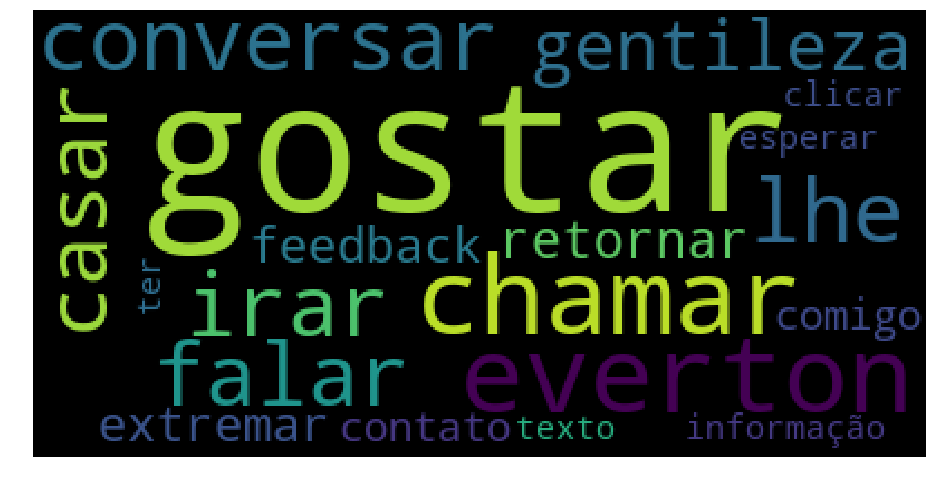

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline 

frases = ' '.join([token.lemma_ for token in doc if (token.is_punct is False and token.is_stop is False)])

wordcloud = WordCloud().generate(frases)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")

In [12]:
doc2 = nlp("Eu acabei de comprar esta televisão nova, por que ela estava com 75% de desconto. Mas só vale este desconto até as nove horas da manhã. Entendeu?".lower())
for ent in doc2:
    if ent.is_punct is False:
        print(ent.text, '   -    ', ent.pos_, ' / ', ent.dep_, '  => is_stop_word: ', ent.is_stop)

eu    -     PRON  /  nsubj   => is_stop_word:  True
acabei    -     AUX  /  aux   => is_stop_word:  False
de    -     ADP  /  obl   => is_stop_word:  True
comprar    -     VERB  /  ROOT   => is_stop_word:  False
esta    -     DET  /  det   => is_stop_word:  True
televisão    -     NOUN  /  obj   => is_stop_word:  False
nova    -     ADJ  /  amod   => is_stop_word:  True
por    -     ADP  /  case   => is_stop_word:  True
que    -     PRON  /  nmod   => is_stop_word:  True
ela    -     PRON  /  nsubj   => is_stop_word:  True
estava    -     VERB  /  cop   => is_stop_word:  True
com    -     ADP  /  case   => is_stop_word:  True
75    -     NUM  /  nummod   => is_stop_word:  False
de    -     ADP  /  case   => is_stop_word:  True
desconto    -     NOUN  /  nmod   => is_stop_word:  False
mas    -     CCONJ  /  cc   => is_stop_word:  True
só    -     ADV  /  advmod   => is_stop_word:  False
vale    -     VERB  /  ROOT   => is_stop_word:  False
este    -     DET  /  det   => is_stop_word:  T

(-0.5, 399.5, 199.5, -0.5)

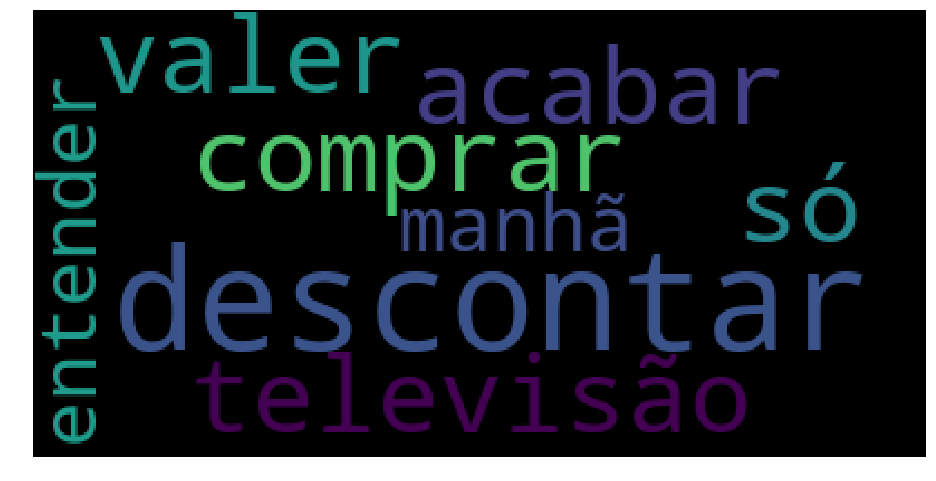

In [13]:
frases2 = ' '.join([token.lemma_ for token in doc2 if (token.is_punct is False and token.is_stop is False)])

wordcloud2 = WordCloud().generate(frases2)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud2)
plt.axis("off")

<br><br>
## Definindo elementos linguisticos que geram subjetividade ou objetividade

In [14]:
# Por motivos de baixo nível técnico, que não irei entrar em detalhes agora, 
# utilizei "set" para armazenar os valores constantes

SUBJECTS = set(["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"])
OBJECTS = set(["dobj", "dative", "attr", "oprd"])

print('Subjetivo: ', SUBJECTS)
print('Objetivo: ', OBJECTS)

Subjetivo:  {'csubjpass', 'expl', 'nsubj', 'csubj', 'nsubjpass', 'agent'}
Objetivo:  {'dative', 'dobj', 'attr', 'oprd'}
